In [30]:
import glob
import matplotlib.pyplot as mp
import numpy
import cartopy
import xarray
import h5py

**Create list of GFED4 files**

In [31]:
file_list = sorted(glob.glob('/Users/baird/Dropbox/_data_observations/GFED4/*.hdf5'))

In [43]:
ds = h5py.File(file_list[0], 'r')

In [48]:
lat_values = ds['lat'].value
lon_values = ds['lon'].value

In [33]:
ba_var = ds['burned_area']

In [58]:
ba_data_allmonths = [ba_var[key]['burned_fraction'] for key in ba_var.keys()]

In [59]:
ba_data_allmonths_sum = numpy.sum(numpy.array(ba_data_allmonths), axis=0)

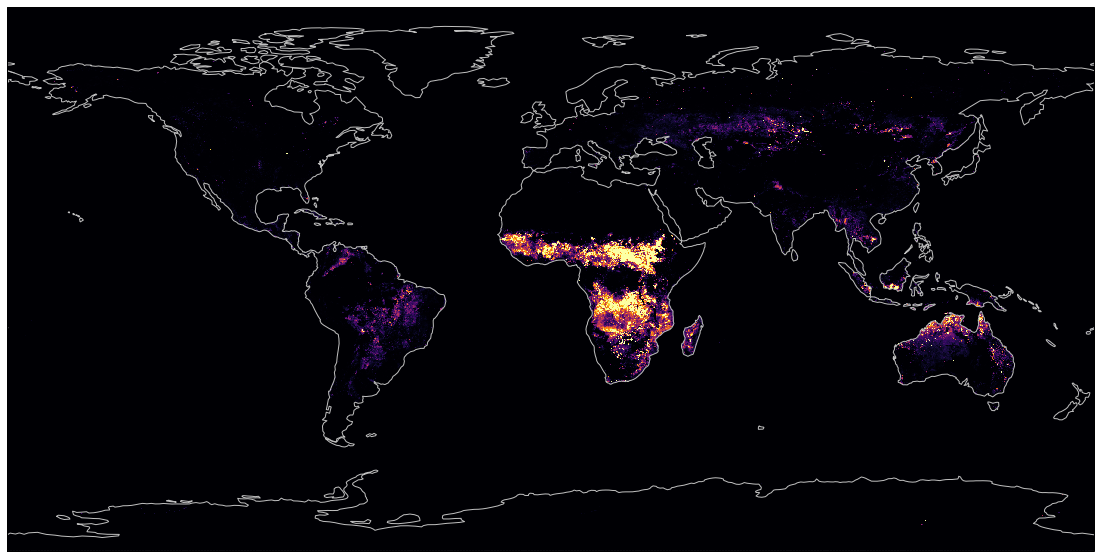

In [60]:
map_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection=map_crs)

ax.pcolormesh(lon_values, lat_values, 
              ba_data_allmonths_sum, 
              transform=data_crs, 
              cmap='inferno',
              vmin=0, vmax=0.5)

ax.coastlines(color='0.75')